# Übungsblatt 4: MCMC

 * [Aufgabe 1](#Aufgabe-1)
 * [Aufgabe 2](#Aufgabe-2)
 
---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

---
## Aufgabe 1
Erzeugen Sie Paare von Zufallszahlen (x, y) die gemäß der zweidimensionalen Dichte

\begin{equation}
    f(x, y) \propto \exp\left(-((x-2)y + y^2)/10\right)\cdot\sin^2(x\cdot y + x)
\end{equation}

verteilt sind. Bestimmen Sie daraus die Verteilung $\rho(r)$ mit $r = x^2 + y^2$.

---

In [2]:
def mcmc_step(pdf, xs):
    ds = np.random.uniform(-3, 3, size=len(xs))
    r = np.random.uniform()
    nxs = xs + ds
    p0 = pdf(xs)
    p1 = pdf(nxs)
    if p1 > p0 or r < (p1 / p0):
        return nxs
    return xs


def mcmc_burnin(pdf, xs, steps=10000):
    for _ in range(steps):
        xs = mcmc_step(pdf, xs)
    return xs


def mcmc_sample(pdf, xs, steps=100000):
    xss = []
    for _ in range(steps):
        xs = mcmc_step(pdf, xs)
        xss.append(xs)
    return np.array(xss).T


def pdf(xs):
    x, y = xs
    return np.exp(-((x - 2) * y + y ** 2) / 10) * np.sin(x * y + x) ** 2


def pdf_old(xs):
    x, y = xs
    return (np.exp(-0.1 * ((x - 2.0) * x + y ** 2)) * np.sin(x * y + x)) ** 2


xs = mcmc_burnin(pdf_old, np.array([0, 0]))
xs, ys = mcmc_sample(pdf_old, xs)

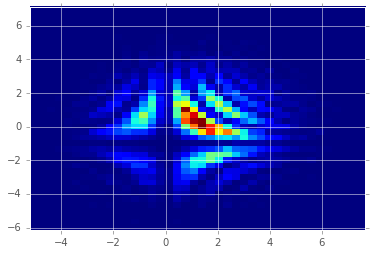

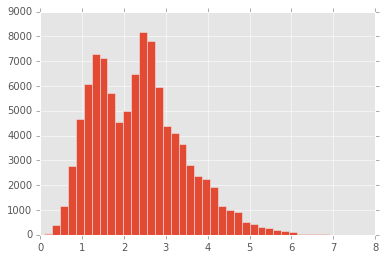

In [3]:
plt.hist2d(xs, ys, bins=40)
plt.show()

plt.hist(np.sqrt(xs ** 2 + ys ** 2), bins=40)
plt.show()

---
## Aufgabe 2
Ein Experiment beobachtet $n$ Ereignisse. Die Nachweiswahrscheinlichkeit für ein Ereignis sei $ε$. Die wahre Anzahl ist Poisson-verteilt mit einem Mittelwert $μ$, der eine Funktion zweier Theorieparameter $a$ und $b$ ist, $μ = ab$. Aus Kalibrationsmessungen ist bekannt dass $ε$ Gauss-verteilt ist mit $ε = 0.75 \pm 0.05$. Vom Parameter $b$ ist bekannt dass er nahe bei $b = 1$ liegt. Für ihn wird eine gleichförmige Verteilung im Bereich $0.9 < b < 1.1$ angenommen. Der Parameter $a$ muss positiv sein. Verwenden Sie bayes’sche Statistik und MCMC, und bestimmen Sie für $n = 1$ und $n = 10$ die posterior Verteilung von $a$ nach Integration über die Nuissance-Parameter $ε$ und $b$.

---